In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [15]:
from multiprocessing import cpu_count

In [23]:
import pickle as pk
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
with open('/home/Container/tgnn/scripts/experimental_sripts/outputs/house/MGBDT/0/output.pkl', 'rb') as fp:
    outputs = pk.load(fp)

In [9]:
from sklearn.manifold import TSNE

In [11]:
outputs

{'gnn': array([[4.429621 ],
        [4.423542 ],
        [3.8242157],
        ...,
        [0.9255488],
        [1.2682076],
        [1.0206625]], dtype=float32),
 'tab': array([[3.267529  , 0.43276423, 0.29110277, 0.5637611 ],
        [2.8023467 , 0.48341742, 0.44147792, 0.46391296],
        [3.174989  , 0.41927814, 0.17484432, 0.6362403 ],
        ...,
        [0.63022184, 0.11894294, 0.37260866, 0.43566915],
        [0.72852236, 0.27898246, 0.38602862, 0.39184737],
        [0.7438139 , 0.20855281, 0.41918597, 0.42214236]], dtype=float32)}

In [12]:
with open('/home/Container/tgnn/scripts/experimental_sripts/outputs_bgnn/0/output.pkl', 'rb') as fp:
    outputs_bgnn = pk.load(fp)

In [13]:
outputs_bgnn

{'gnn': array([[ 2.90440232e-01, -2.15865672e-01,  8.59240652e-04, ...,
         -1.01331770e-01,  4.96771306e-01,  2.03219131e-01],
        [ 4.46153790e-01, -3.11712146e-01,  1.31990481e-03, ...,
         -2.20614970e-01,  1.15891790e+00,  4.74089921e-01],
        [ 3.69474977e-01, -2.66074479e-01,  1.09305745e-03, ...,
         -1.72995687e-01,  8.83173585e-01,  3.61288488e-01],
        ...,
        [ 6.91325143e-02, -5.62387705e-02,  2.04522134e-04, ...,
         -3.80424857e-02,  1.80335343e-01,  7.37715513e-02],
        [ 1.10080555e-01, -8.80466104e-02,  3.25663132e-04, ...,
         -5.95829487e-02,  2.85634726e-01,  1.16847411e-01],
        [ 6.50124773e-02, -5.29776216e-02,  1.92333391e-04, ...,
         -3.58332992e-02,  1.69669658e-01,  6.94084316e-02]], dtype=float32),
 'tab': array([[3.14506809],
        [2.19584096],
        [3.15948296],
        ...,
        [0.33271279],
        [0.49789501],
        [0.39692202]])}

In [16]:
coords = TSNE(n_jobs=cpu_count()).fit_transform(outputs_bgnn['gnn'])

In [19]:
coords

array([[-22.677593 ,  23.828442 ],
       [ 22.61728  ,  21.099089 ],
       [ -4.2604733,  60.445614 ],
       ...,
       [ 48.82282  ,  33.894928 ],
       [-89.28608  ,   5.670484 ],
       [ 29.900675 ,  12.778839 ]], dtype=float32)

array([[-22.67759323,  23.82844162,   3.14506809],
       [ 22.61727905,  21.09908867,   2.19584096],
       [ -4.26047325,  60.44561386,   3.15948296],
       ...,
       [ 48.82281876,  33.89492798,   0.33271279],
       [-89.28607941,   5.67048407,   0.49789501],
       [ 29.90067482,  12.77883911,   0.39692202]])

In [34]:
import matplotlib.pyplot as plt

In [51]:
data = pd.DataFrame(np.append(coords, outputs['tab'][:,:1], axis=1), columns=['x', 'y', 'color'])

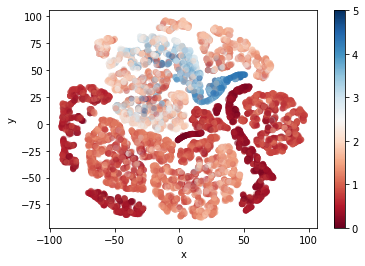

In [58]:
ax = sns.scatterplot(x='x', y='y', hue='color', data = data, palette='RdBu', linewidth=0, alpha=0.3)
norm = plt.Normalize(0, 5)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.savefig('/home/Container/pics/MGBDT_mid_layer.pdf', format='pdf', bbox_inches='tight')

In [53]:
data_bgnn = pd.DataFrame(np.append(coords, outputs_bgnn['tab'], axis=1), columns=['x', 'y', 'color'])

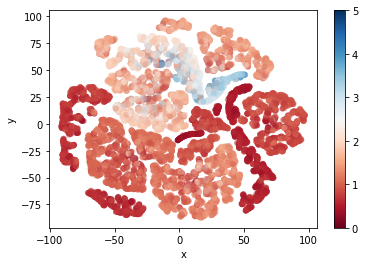

In [59]:
ax = sns.scatterplot(x='x', y='y', hue='color', data = data_bgnn, palette='RdBu', linewidth=0, alpha=0.3)
norm = plt.Normalize(0, 5)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.savefig('/home/Container/pics/BGNN_mid_layer.pdf', format='pdf', bbox_inches='tight')

In [55]:
y = pd.read_csv(f'/home/Container/bgnn/datasets/house/y.csv').values

In [56]:
data_true = pd.DataFrame(np.append(coords, y, axis=1), columns=['x', 'y', 'color'])

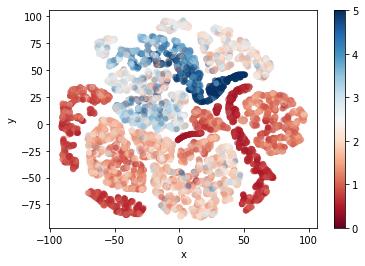

In [61]:
ax = sns.scatterplot(x='x', y='y', hue='color', data = data_true, palette='RdBu', linewidth=0, alpha=0.3)
norm = plt.Normalize(0, 5)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.savefig('/home/Container/pics/target_mid_layer.pdf', format='pdf', bbox_inches='tight')